# BNED

In [ ]:
!pip install --upgrade -q gspread

Add things from one file to another

In [ ]:
infile = open("words_alpha.txt", 'r') # open file for reading
outfile = open("pyout.txt","w") # open file for appending

line = infile.readline()    # Invokes readline() method on file
while line:
  outfile.write(line.strip("\n")+",\n")
  line = infile.readline()

infile.close()
outfile.close()

JSON file up-loader

In [ ]:
#json file uploader
import io
import json
from google.colab import files
uploaded = files.upload()



In [ ]:
uploaded

NameError: ignored

In [ ]:
file_name = "Trivium BNED-3597c7bd6ab1.json"
io.StringIO(uploaded[file_name].decode("utf-8"))

In [ ]:
json.loads(uploaded[file_name].decode("utf-8"))

Access google Sheets

In [ ]:
#acessing the google sheets
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
#from oauth2client.client import ServiceAccountCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

**READING THE SHEETS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
##formatting
%matplotlib inline
from pprint import pprint

worksheet = gc.open("Quality Sheet - March 2020").worksheet("Computer Sci")
data = worksheet.get_all_records()
df = pd.DataFrame.from_records(data)
##formatting
pd.set_option('display.max_columns', 26)

##Test to check sheet is loaded
print(df.head(1))

4
16


([<matplotlib.patches.Wedge at 0x7f5e3e9e2c50>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Incorrect'),
  Text(-0.8899186574910393, -0.6465638275138399, 'Correct')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.48541017681329407, -0.3526711786439127, '80.0%')])

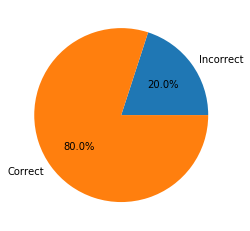

In [ ]:
##ploting of wrong answer
Yes_count = (df['Wrong Answer']=="Yes").sum()
print(Yes_count)
No_count = (df['Wrong Answer']=="No").sum()
print(No_count)

incorrect=[]
incorrect.append(Yes_count)
incorrect.append(No_count)

plt.pie(incorrect,labels=["Incorrect","Correct"],autopct='%1.1f%%')


6
3


([<matplotlib.patches.Wedge at 0x7f5e3e509b38>,
 [Text(-0.5500000594609755, 0.9526279098330699, 'Should Reject'),
  Text(0.5500001486524352, -0.9526278583383436, 'Should Accept')],
 [Text(-0.30000003243325934, 0.5196152235453108, '66.67%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

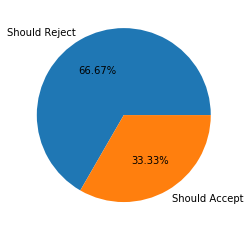

In [ ]:
##ploting of correct rejection answer
Yes_count = (df['Correct Rejection?']=="Yes").sum()
print(Yes_count)
No_count = (df['Correct Rejection?']=="No").sum()
print(No_count)

rejection=[]
rejection.append(Yes_count)
rejection.append(No_count)

plt.pie(rejection,labels=["Should Reject","Should Accept"],autopct='%1.2f%%')

143
7
147
3


([<matplotlib.patches.Wedge at 0x7f64e9a05630>,
 [Text(-1.093974074857458, 0.11498140519131458, 'Acceptable'),
  Text(1.0939740654377852, -0.11498149481340372, 'formatting plag and incomplete error')],
 [Text(-0.5967131317404315, 0.06271713010435341, '96.67%'),
  Text(0.5967131266024281, -0.0627171789891293, '3.33%')])

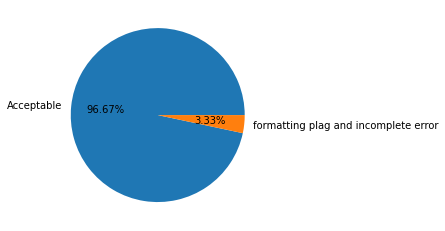

In [ ]:
##ploting of formatting plag and incomplete 
Good_Count1 = (df['Answer Quality']=="Good").sum()
print(Good_Count1)
Bad_count1 = (df['Answer Quality']=="Bad").sum()
print(Bad_count1)


Good_Count2 = (df['Answer Structure and Formatting']=="Correct").sum()
print(Good_Count2)
Bad_count2 = (df['Answer Structure and Formatting']=="Incorrect").sum()
print(Bad_count2)

Good_Count = Good_Count1 + Good_Count2
Bad_count = Bad_count1 + Bad_count2

quality=[]
quality.append(Good_Count)
quality.append(Bad_count)




plt.pie(quality,labels=["Acceptable","formatting plag and incomplete error"],autopct='%1.2f%%')

13
26


([<matplotlib.patches.Wedge at 0x7f5e3e4d69e8>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Reject'),
  Text(-0.5499998810780428, -0.9526280128224968, ' Answer')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.29999993513347784, -0.5196152797213618, '66.67%')])

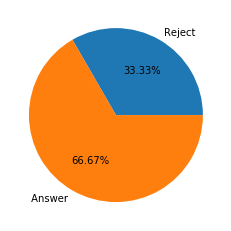

In [ ]:
##ploting of rejection answer
Yes_count = (df['question_status']=="Rejected").sum()
print(Yes_count)
No_count = (df['question_status']=="Answered").sum()
print(No_count)

ans_rej=[]
ans_rej.append(Yes_count)
ans_rej.append(No_count)

plt.pie(ans_rej,labels=["Reject"," Answer"],autopct='%1.2f%%')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
##formatting
%matplotlib inline
from pprint import pprint

worksheet = gc.open("BNED - DUMPING").worksheet("March")
data = worksheet.get_all_records()
dt = pd.DataFrame.from_records(data)
##formatting
pd.set_option('display.max_columns', 26)

##Test to check sheet is loaded
print(dt.head(1))

                                        question_url parent_subject  \
0  bartleby.com/questions-and-answers/you-are-giv...    Engineering   

          child_subject question_created_date_et question_status  \
0  Computer Engineering            3/17/20 23:06        Rejected   

  question_status_date_et        sme_name  time_till_replied Wrong Answer  \
0           3/17/20 23:34  Shahbaz Haider           0.465556                

  Answer Quality Answer Structure and Formatting Rejection Message Comments  \
0                                                                      Good   

  Correct Rejection?   Trivium Comments Action Taken  \
0                 No  Should have tried                

  Date Reviewed \n(MM/DD/YYYY)  
0                               


2
148


([<matplotlib.patches.Wedge at 0x7f64e96a35c0>,
 [Text(1.0990351130620228, 0.046063220216859775, 'Incorrect'),
  Text(-1.099035111175194, -0.04606326523521301, 'Correct')],
 [Text(0.5994736980338305, 0.025125392845559875, '1.3%'),
  Text(-0.5994736970046511, -0.025125417401025273, '98.7%')])

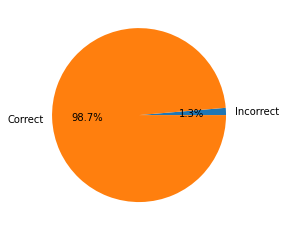

In [ ]:
##ploting of wrong answer
Yes_count = (dt['Wrong Answer']=="Yes").sum()
print(Yes_count)
No_count = (dt['Wrong Answer']=="No").sum()
print(No_count)

incorrect=[]
incorrect.append(Yes_count)
incorrect.append(No_count)

plt.pie(incorrect,labels=["Incorrect","Correct"],autopct='%1.1f%%')


156
83


([<matplotlib.patches.Wedge at 0x7f64e9676358>,
 [Text(-0.5077453688513692, 0.9758046117999173, 'Should Reject'),
  Text(0.5077453688513691, -0.9758046117999173, 'Should Accept')],
 [Text(-0.2769520193734741, 0.532257060981773, '65.27%'),
  Text(0.276952019373474, -0.532257060981773, '34.73%')])

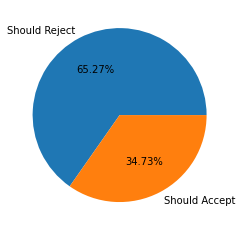

In [ ]:
##ploting of correct rejection answer
Yes_count = (dt['Correct Rejection?']=="Yes").sum()
print(Yes_count)
No_count = (dt['Correct Rejection?']=="No").sum()
print(No_count)

rejection=[]
rejection.append(Yes_count)
rejection.append(No_count)

plt.pie(rejection,labels=["Should Reject","Should Accept"],autopct='%1.2f%%')

143
7
147
3


([<matplotlib.patches.Wedge at 0x7f64e9630940>,
 [Text(-1.093974074857458, 0.11498140519131458, 'Acceptable'),
  Text(1.0939740654377852, -0.11498149481340372, 'formatting plag and incomplete error')],
 [Text(-0.5967131317404315, 0.06271713010435341, '96.67%'),
  Text(0.5967131266024281, -0.0627171789891293, '3.33%')])

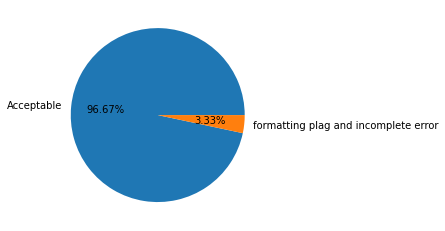

In [ ]:
##ploting of formatting plag and incomplete 
Good_Count1 = (dt['Answer Quality']=="Good").sum()
print(Good_Count1)
Bad_count1 = (dt['Answer Quality']=="Bad").sum()
print(Bad_count1)


Good_Count2 = (dt['Answer Structure and Formatting']=="Correct").sum()
print(Good_Count2)
Bad_count2 = (dt['Answer Structure and Formatting']=="Incorrect").sum()
print(Bad_count2)

Good_Count = Good_Count1 + Good_Count2
Bad_count = Bad_count1 + Bad_count2

quality=[]
quality.append(Good_Count)
quality.append(Bad_count)




plt.pie(quality,labels=["Acceptable","formatting plag and incomplete error"],autopct='%1.2f%%')

274
190


([<matplotlib.patches.Wedge at 0x7f64e95ede10>,
 [Text(-0.3086062338830645, 1.0558229929341905, 'Reject'),
  Text(0.3086061350297802, -1.0558230218279867, ' Answer')],
 [Text(-0.16833067302712607, 0.5759034506913765, '59.05%'),
  Text(0.16833061910715283, -0.575903466451629, '40.95%')])

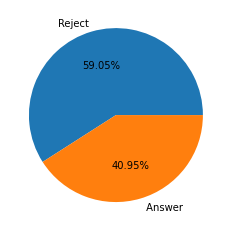

In [ ]:
##ploting of rejection and answer
Yes_count = (dt['question_status']=="Rejected").sum()
print(Yes_count)
No_count = (dt['question_status']=="Answered").sum()
print(No_count)

ans_rej=[]
ans_rej.append(Yes_count)
ans_rej.append(No_count)

plt.pie(ans_rej,labels=["Reject"," Answer"],autopct='%1.2f%%')